In [1]:
import torch

In [2]:
from __future__ import print_function

In [3]:
y = torch.rand(5,3)
print(y)

tensor([[0.6826, 0.8300, 0.6923],
        [0.5620, 0.7919, 0.4939],
        [0.2197, 0.6753, 0.1420],
        [0.9071, 0.1179, 0.5731],
        [0.9601, 0.2674, 0.8613]])


In [4]:
x = torch.rand_like(y, dtype=torch.float)
print(x)

tensor([[0.6940, 0.0085, 0.8673],
        [0.0925, 0.3264, 0.5908],
        [0.7811, 0.9553, 0.7716],
        [0.0496, 0.8313, 0.4612],
        [0.8445, 0.5660, 0.4526]])


In [5]:
print(x + y)

tensor([[1.3766, 0.8386, 1.5597],
        [0.6545, 1.1184, 1.0847],
        [1.0009, 1.6306, 0.9137],
        [0.9567, 0.9492, 1.0343],
        [1.8046, 0.8334, 1.3139]])


In [6]:
print(torch.add(x, y))

tensor([[1.3766, 0.8386, 1.5597],
        [0.6545, 1.1184, 1.0847],
        [1.0009, 1.6306, 0.9137],
        [0.9567, 0.9492, 1.0343],
        [1.8046, 0.8334, 1.3139]])


In [7]:
result = torch.empty(5,3)

In [8]:
torch.add(x, y, out=result)

tensor([[1.3766, 0.8386, 1.5597],
        [0.6545, 1.1184, 1.0847],
        [1.0009, 1.6306, 0.9137],
        [0.9567, 0.9492, 1.0343],
        [1.8046, 0.8334, 1.3139]])

In [9]:
print(result)

tensor([[1.3766, 0.8386, 1.5597],
        [0.6545, 1.1184, 1.0847],
        [1.0009, 1.6306, 0.9137],
        [0.9567, 0.9492, 1.0343],
        [1.8046, 0.8334, 1.3139]])


In [10]:
y.add_(x)

tensor([[1.3766, 0.8386, 1.5597],
        [0.6545, 1.1184, 1.0847],
        [1.0009, 1.6306, 0.9137],
        [0.9567, 0.9492, 1.0343],
        [1.8046, 0.8334, 1.3139]])

바꿔치기 방식으로 텐서 값을 변경할 때는 _ 을 접미사로 갖는다

EX) x.copy_(y)는 x에 y를 복사하여 집어넣는다

In [11]:
print(y[:,1])

tensor([0.8386, 1.1184, 1.6306, 0.9492, 0.8334])


텐서 크기나 모양을 변경하고 싶을 때 torch.view를 사용한다

In [12]:
x = torch.randn(4,4)
print(x)

tensor([[ 0.8155, -0.0203,  0.4283, -1.5307],
        [-2.0692,  1.4903,  0.9240,  0.6608],
        [-1.6987, -0.2028, -0.2644,  0.4949],
        [-0.3326,  0.2413, -0.2753,  0.0010]])


In [13]:
y = x.view(16)
print(y)

tensor([ 0.8155, -0.0203,  0.4283, -1.5307, -2.0692,  1.4903,  0.9240,  0.6608,
        -1.6987, -0.2028, -0.2644,  0.4949, -0.3326,  0.2413, -0.2753,  0.0010])


In [14]:
z = x.view(-1,8)
print(z)

tensor([[ 0.8155, -0.0203,  0.4283, -1.5307, -2.0692,  1.4903,  0.9240,  0.6608],
        [-1.6987, -0.2028, -0.2644,  0.4949, -0.3326,  0.2413, -0.2753,  0.0010]])


.item 명령어를 통해서 숫자 값을 도출하기

In [15]:
x = torch.randn(1)

In [16]:
print(x)

tensor([-1.9809])


In [17]:
print(x.item())

-1.9809157848358154


In [18]:
y = torch.randn(2)

In [19]:
print(y)

tensor([0.6397, 0.3966])


In [20]:
print(y.item())

ValueError: only one element tensors can be converted to Python scalars

파이썬 스칼라로 변환된 값만 item으로 추출할 수 있다

In [ ]:
torch.is_tensor(y)

torch.is_tensor는 텐서이면 참을 리턴한다.

In [ ]:
torch.is_storage(y)

# Numpy 변환

In [ ]:
a = torch.ones(5)
print(a)

In [ ]:
b = a.numpy()
print(b)

In [ ]:
a.add_(1)

In [ ]:
print(b)

Numpy to Tensor

In [ ]:
import numpy as np

In [ ]:
a = np.ones(5)
print(a)

In [ ]:
b = torch.from_numpy(a)
print(b)

In [ ]:
np.add(a, 1, out=a)

In [ ]:
print(a)

In [ ]:
print(b)

## CUDA Tensors
.to 메소드로 외부 장치로 옮기기

In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda") # CUDA 장치 객체로
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

## Autograd: 자동 미분

In [ ]:
x = torch.ones(2,2,requires_grad=True) # 해당 텐서의 연산을 추적하도록 하는 명령
print(x)

In [ ]:
y = x + 2
print(y)

In [ ]:
print(y.grad_fn)

In [ ]:
z = y * y * 3
out = z.mean()
print(z, out)

In [ ]:
print(z.grad_fn)

In [ ]:
a = torch.ones(2,2)
print(a)

In [ ]:
b = torch.tensor([[1,2],[3,4]],dtype=torch.float)#텐서 타입을 float으로 변환해준다
print(b)

In [ ]:
c = a * b
print(c)

In [ ]:
d = b * a
print(d)

In [ ]:
a = torch.randn(2, 2)
print(a)

In [ ]:
a = ((a * 3) / (a - 1))
print(a)

In [ ]:
print(a.requires_grad)

In [ ]:
a.requires_grad_(True)

.requires_grad_()는 해당 텐서의 requires_grad 여부를 덮어쓰기 한다. 즉 작성시에는 추적이 참이 아닌 텐서를 트래킹 하도록 명령할 수 있다.

In [ ]:
print(a.requires_grad)

In [ ]:
b = (a * a).sum()
print(b)

.sum은 텐서 각 성분의 합을 구하는 명령어인가?

In [ ]:
x = torch.tensor([[1.,2.],[3.,4.]])
print(x)

In [ ]:
print(x.sum())

Profit!!!

In [ ]:
print(b.grad_fn)

In [ ]:
out.backward()

In [ ]:
print(x.grad)

.grad는 역전파를 추적한다. out = mean((x + 2) * (x + 2) * 3)),x=1 이므로, 이를 추적하여 x=1을 대입한 결과가 위에 해당함

In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

In [ ]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    print(x.grad)
print(y)

In [ ]:
print(x.grad)

### 왜 트래킹 중인 x의 변화도를 추적하지 않는가?

In [ ]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)

In [ ]:
y.backward(gradients)

backward 명령어는 필수인가? gradients는 어째서 사용하는가?

In [ ]:
print(x.grad)

### 왜 이런 과정을 거쳐야 추적할 수 있는가?

In [ ]:
print(x.requires_grad)

In [ ]:
print((x ** 2).requires_grad)

In [ ]:
with torch.no_grad():
    print((x ** 2).requires_grad)

# 신경망

nn.Module이 계층과 포워드 메서드를 포함한다. nn이 모델을 정의하며 autograd를 사용함

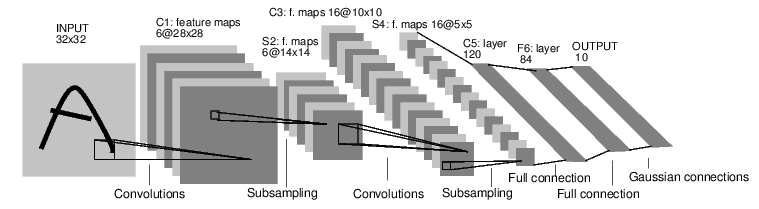

## 신경망 정의하기

In [ ]:
import torch

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        #1 input image channel, 6 output channeels, 5x5 square convolution
        #kernel
        self.conv1 = nn.Conv2d(1, 6, 5)#nSamples x nChannels x Height x Width
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self,x):
        #Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] #all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)        

In [ ]:
params = list(net.parameters())

In [ ]:
print(len(params))

In [ ]:
print(params[0].size()) # conv1's .weight

In [ ]:
print(params[4].size())

In [ ]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

이 네트워크는 32x32 데이터만을 입력받아 연산한다

In [ ]:
net.zero_grad()

In [ ]:
out.backward(torch.randn(1,10))

torch.nn에서는 여러 손실함수를 제공하고 있다. 예를 들어, 평균자승 오차는 다음과 같다

In [ ]:
output = net(input)

In [ ]:
target = torch.arange(1,11,dtype=torch.float) # a dummy target, for example

왜 형상이 output과 맞지 않는지 알 수 없다

In [ ]:
target = target.view(1,-1) # make it the same shape as output

이런다고 자동으로 맞춰지는가?

In [ ]:
criterion = nn.MSELoss()

In [ ]:
loss = criterion(output, target)
print(loss)

역전파 단계를 따라가보도록 하자

In [ ]:
print(loss.grad_fn)

In [ ]:
print(loss.grad_fn.next_functions[0][0]) #Linear

In [ ]:
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) #ReLU

## 역전파

In [ ]:
net.zero_grad() # zeros the gradient buffers of all parameters

역전파를 시행할 때, 기존 변화도를 지우는 작업이 수반되지 않으면 변화도가 누적된다

In [ ]:
print('conv1.bias.grad before backward')

In [ ]:
print(net.conv1.bias.grad)

In [ ]:
loss.backward()

In [ ]:
print('conv1.bias.grad after backward')

In [ ]:
print(net.conv1.bias.grad)

## 가중치 갱신

In [ ]:
learning_rate = 0.01

In [ ]:
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)#f가 패러미터 안에 있는 동안 변화도 * 학습률만큼 뺀 값을 갱신해 넣는다

다양한 갱신 규칙을 사용하기 용이하도록, torch.optim이라는 패키지에 구현되어 있다

In [ ]:
import torch.optim as optim

In [ ]:
#optimizer 생성
optimizer = optim.SGD(net.parameters(), lr = 0.01)

In [ ]:
#학습과정은 다음과 같다
optimizer.zero_grad() # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

optimizer.zero_grad()를 통해 변화도 버퍼를 0으로 수동으로 맞춰주는 것을 유의한다. 변화도 누적을 방지하기 위함

# 분류기 학습하기

torchvision을 이용하여, 여러 데이터셋을 쉽게 불러올 수 있다

In [1]:
import torch

In [2]:
import torchvision

In [3]:
import torchvision.transforms as transforms

tochvision 데이터셋은 [0,1]의 범위를 갖는 이미지이다. 이를 [-1,1]로 정규화된 텐서로 변환한다

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

Files already downloaded and verified


In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [7]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [8]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [9]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [10]:
import matplotlib.pyplot as plt

In [11]:
import numpy as np

In [12]:
def imshow(img):
    img = img / 2 + 0.5 #numnoralize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [13]:
dataiter = iter(trainloader) #무작위 이미지 가져오기

In [14]:
images, labels = dataiter.next()

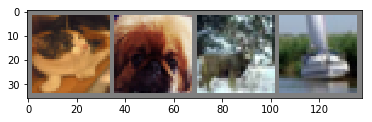

In [15]:
imshow(torchvision.utils.make_grid(images))#이미지 보여주기

In [16]:
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

  cat   dog  deer  ship


## 합성곱 신경망 정의하기

In [17]:
import torch.nn as nn

In [18]:
import torch.nn.functional as F

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self,x):
       
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

손실 함수와 optimizer 정의하기

In [20]:
import torch.optim as optim

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) #What is momentum?

## 신경망 학습하기

In [22]:
for epoch in range(2):
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #입력을 받은 후
        inputs, labels = data
        
        #변화도 매개변수를 0으로 만든 후
        optimizer.zero_grad()
        
        #순전파 + 역전파 + 최적화
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        #통계 출력
        running_loss += loss.item()
        if i % 2000 == 1999: #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
print('Finished Training')

[1,  2000] loss: 2.182
[1,  4000] loss: 1.819
[1,  6000] loss: 1.660
[1,  8000] loss: 1.572
[1, 10000] loss: 1.527
[1, 12000] loss: 1.480
[2,  2000] loss: 1.398
[2,  4000] loss: 1.388
[2,  6000] loss: 1.349
[2,  8000] loss: 1.328
[2, 10000] loss: 1.296
[2, 12000] loss: 1.276
Finished Training


## 시험용 데이터로 신경망 검사하기

신경망의 예측값과 진짜 정답을 비교하여, 예측이 맞으면 샘플을 맞은 예측값에 넣을 것이다

In [23]:
dataiter = iter(testloader)

In [24]:
images, labels = dataiter.next()

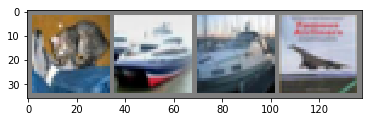

In [25]:
#print images
imshow(torchvision.utils.make_grid(images))

In [26]:
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

GroundTruth:    cat  ship  ship plane


신경망이 어떻게 예측했는지 보자

In [27]:
outputs = net(images)

In [28]:
_, predicted = torch.max(outputs, 1)

In [29]:
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship plane plane


전체 데이터셋에서의 동작을 본다

In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


어느 것을 더 잘 분류했을까?

In [31]:
class_correct = list(0. for i in range(10))

In [32]:
class_total = list(0. for i in range(10))

In [33]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of 5%s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of 5plane : 57 %
Accuracy of 5car : 76 %
Accuracy of 5bird : 56 %
Accuracy of 5cat : 22 %
Accuracy of 5deer : 31 %
Accuracy of 5dog : 47 %
Accuracy of 5frog : 70 %
Accuracy of 5horse : 62 %
Accuracy of 5ship : 72 %
Accuracy of 5truck : 62 %


## GPU에서 학습하기

In [34]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #CUDA 기기에서 돌린다고 가정하면 CUDA를 출력

In [35]:
print(device)

cuda:0


In [36]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [37]:
inputs, labels = inputs.to(device), labels.to(device)